# Homework 1

In [124]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression, mutual_info_regression
import pandas as pd

In [125]:
# Missing optional dependency 'xlrd'. Install xlrd >= 2.0.1 for xls Excel support Use pip or conda to install xlrd.
#while using pd.read_excel()
# %pip install xlrd

In [126]:
filePath = '/Users/maliniradhakrishnan/Desktop/MIS/sem 4/PETE/HW1/Feature_Target.xls'
raw_df = pd.read_excel(filePath, header = None) #Looks like the file doesnt have headers, so header = None
raw_df.head()
# raw_df.shape

,0,1,2,3,4,5,6,7,8,9,...,159,160,161,162,163,164,165,166,167,168
0,21232,23203,38,-176,-158,31,-117,-93,42,41,...,-318,-208,22,55,118,78,-28,3,73,1
1,1254,25403,52,-120,-24,-41,-117,33,-164,71,...,-201,57,-21,-48,94,98,-14,10,97,2
2,210146,14614,49,-186,-141,143,-117,-25,197,-8,...,-29,-175,20,153,130,54,-44,-24,-19,1
3,21289,28904,57,12,41,-72,-117,75,-163,-86,...,-318,46,-15,-46,76,111,-10,4,110,1
4,21220,22005,35,-124,-140,110,-117,-31,51,-174,...,-316,-198,-30,4,104,98,-23,-4,95,1


In [127]:
data = raw_df.values[:, :-1] #all rows and columns except the last column
# data.shape
target = raw_df.values[:, -1] #only the last column
# target
# target.shape

In [128]:
X = data
y = target
print('X data shape= ', X.shape)
print('y target shape= ', y.shape)

X data shape=  (476, 168)
y target shape=  (476,)


### Raw Unscaled Data

In [129]:
from sklearn.model_selection import train_test_split
#splitting test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) #20% is test data
#note that this data is raw and unscaled

In [130]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(380, 168) (96, 168) (380,) (96,)


In [131]:
#for raw, unscaled data, using the variance filer- not doing this step as per Dr. Misra's latest message on canvas
# from sklearn.feature_selection import VarianceThreshold
# var_threshold = VarianceThreshold(threshold = 0.01) #removing features which have similar values 99% of the time
# var_threshold.fit(X_train)
# X_train_unscaled_variance_filtered = var_threshold.transform(X_train)
# X_test_unscaled_variance_filtered = var_threshold.transform(X_test)
# print('X train raw variance filter shape= ', X_train_unscaled_variance_filtered.shape)
# print('X test raw variance filter shape=', X_test_unscaled_variance_filtered.shape)

In [132]:
#RAW UNSCALED DATA: running the default logistic regression, random forest and KNN for raw unscaled data 

#KNN
from sklearn.neighbors import KNeighborsRegressor 
kn = KNeighborsRegressor() #using the default hyperparamteres
# train on unscaled raw data and test on unscaled raw data 
kn.fit(X_train, y_train) #learn from the training data
knn_raw_unscaled_data_score = kn.score(X_test, y_test)
print("KNN: Score for raw unscaled data: %f" % knn_raw_unscaled_data_score) 

#Logistic Regression
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression(max_iter = 10000) #using the default hyperparamteres- gives a convergence warning, gets resolved if I set max_iter = 10000
lr.fit(X_train, y_train)
lr_raw_unscaled_data_score = lr.score(X_test, y_test)
print("LR: Score for raw unscaled data: %f" % lr_raw_unscaled_data_score) 

#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier() #using the default hyperparamteres
rf.fit(X_train, y_train)
rf_raw_unscaled_data_score = rf.score(X_test, y_test)
print("Random Forest: Score for raw unscaled data: %f" % rf_raw_unscaled_data_score)

KNN: Score for raw unscaled data: 1.000000
LR: Score for raw unscaled data: 0.947917
Random Forest: Score for raw unscaled data: 0.947917


### Scaled Data using Standard Scaler

In [133]:
from sklearn.preprocessing import StandardScaler
#Standard scaling for scaled data
scl = StandardScaler()
scl.fit(X_train)
X_train_scaled = scl.transform(X_train) #scaling train data
X_test_scaled = scl.transform(X_test) #scaling test data

In [134]:
#SCALED DATA: running the default logistic regression, random forest and KNN for scaled data using standard scaler

#KNN
kn.fit(X_train_scaled, y_train) #learn from the training data
knn_scaled_data_score = kn.score(X_test_scaled, y_test)
print("KNN: Score with all for raw scaled data: %f" % knn_scaled_data_score) 

#Logistic Regression
lr.fit(X_train_scaled, y_train)
lr_scaled_data_score = lr.score(X_test_scaled, y_test)
print("LR: Score with for raw scaled data: %f" % lr_scaled_data_score) 

#Random Forest
rf.fit(X_train_scaled, y_train)
rf_scaled_data_score = rf.score(X_test_scaled, y_test)
print("Random Forest: Score with for raw scaled data: %f" % rf_scaled_data_score)

KNN: Score with all for raw scaled data: 0.580109
LR: Score with for raw scaled data: 0.875000
Random Forest: Score with for raw scaled data: 0.979167


### Slightly reduced scaled data

In [135]:
#Slightly reduced scaled data using association test- not using variance filter 
# as per Dr.Misra's latest message on Canvas
from sklearn.feature_selection import f_classif #usinf f_classif since target is categorical
from sklearn.feature_selection import mutual_info_classif #non-linear

F, p = f_classif(X_train_scaled, y_train) #computing F score and p from train data and target
mi = mutual_info_classif(X_train_scaled, y_train, random_state = 42)  #learn preprocessing from train 
#also got to know that mutual_info_classif has some randomness which was why 
#i was probably getting different number of significant features

In [136]:
# #Plot for F
# plt.figure()
# plt.plot(F, 'o')
# plt.ylabel('F value')
# plt.xlabel('features')

In [137]:
# #Plot for p
# plt.figure()
# plt.semilogy(p, 'o')
# plt.semilogy(0.01*np.ones(len(p)), '--') #p should be less than 0.01
# plt.ylabel('p value')
# plt.xlabel('features')

In [138]:
# #mi values for non-linear
# plt.figure()
# plt.plot(mi, 'o')
# plt.ylabel('mi value')
# plt.xlabel('features')

In [139]:
#choosing features with F score greater than 20 and p less than 0.05, or mi greater than 0.1
print('no. of significant features from scaled data post variance filter and association test: {}'.format(len(p[((F>20)&(p<0.05))|(mi>0.1)]))) 

no. of significant features from scaled data post variance filter and association test: 61


In [140]:
#Creating Slightly reduced scaled data using the mask
X_train_scaled_assoc_reduced = X_train_scaled[:, ((F>20)&(p<0.01))|(mi>0.1)]
X_test_scaled_assoc_reduced = X_test_scaled[:, ((F>20)&(p<0.01))|(mi>0.1)]
print('X train scaled association test shape= ', X_train_scaled_assoc_reduced.shape)
print('X test scaled association test shape=', X_test_scaled_assoc_reduced.shape)

X train scaled association test shape=  (380, 61)
X test scaled association test shape= (96, 61)


In [141]:
#SLIGHTLY REDUCED SCALED DATA: running the default logistic regression, random forest and KNN for scaled data association test

#KNN
kn.fit(X_train_scaled_assoc_reduced, y_train) #learn from the training data
knn_slightly_reduced_scaled_data_score = kn.score(X_test_scaled_assoc_reduced, y_test)
print("KNN: Score for scaled data post association test: %f" % knn_slightly_reduced_scaled_data_score) 

#Logistic Regression
lr.fit(X_train_scaled_assoc_reduced, y_train)
lr_slightly_reduced_scaled_data_score = lr.score(X_test_scaled_assoc_reduced, y_test)
print("LR: Score for scaled data post association test: %f" % lr_slightly_reduced_scaled_data_score) 

#Random Forest
rf.fit(X_train_scaled_assoc_reduced, y_train)
rf_slightly_reduced_scaled_data_score = rf.score(X_test_scaled_assoc_reduced, y_test)
print("Random Forest: Score for scaled data post association test: %f" % rf_slightly_reduced_scaled_data_score)

KNN: Score for scaled data post association test: 0.555717
LR: Score for scaled data post association test: 0.843750
Random Forest: Score for scaled data post association test: 0.958333


### Intermediately reduced scaled data

In [142]:
#Intermediately reduced scaled data using RFE post association test
from sklearn.feature_selection import RFE

# instantiate recursive feature selection
# using default hyperparamters for RandomForestClassifier, and RFE
select = RFE(RandomForestClassifier())

# learn from scaled data
select.fit(X_train_scaled_assoc_reduced, y_train)
X_train_scaled_assoc_reduced_rfe  = select.transform(X_train_scaled_assoc_reduced) #removing unwanted features
X_test_scaled_assoc_reduced_rfe = select.transform(X_test_scaled_assoc_reduced)

print('X train scaled assoc RFE shape= ', X_train_scaled_assoc_reduced_rfe.shape)
print('X test scaled assoc RFE shape=', X_test_scaled_assoc_reduced_rfe.shape)

X train scaled assoc RFE shape=  (380, 30)
X test scaled assoc RFE shape= (96, 30)


In [143]:
#INTERMEDIATELY REDUCED SCALED DATA: running the default logistic regression, random forest and KNN for scaled data after association test and RFE

#KNN
kn.fit(X_train_scaled_assoc_reduced_rfe, y_train) #learn from the training data
knn_intermediately_reduced_scaled_data_score = kn.score(X_test_scaled_assoc_reduced_rfe, y_test)
print("KNN: Score for scaled data post association test and RFE: %f" % knn_intermediately_reduced_scaled_data_score) 

#Logistic Regression
lr.fit(X_train_scaled_assoc_reduced_rfe, y_train)
lr_intermediately_reduced_scaled_data_score = lr.score(X_test_scaled_assoc_reduced_rfe, y_test)
print("LR: Score for scaled data post association test and RFE: %f" % lr_intermediately_reduced_scaled_data_score) 

#Random Forest
rf.fit(X_train_scaled_assoc_reduced_rfe, y_train)
rf_intermediately_reduced_scaled_data_score = rf.score(X_test_scaled_assoc_reduced_rfe, y_test)
print("Random Forest: Score for scaled data post association test and RFE: %f" % rf_intermediately_reduced_scaled_data_score)

KNN: Score for scaled data post association test and RFE: 0.486025
LR: Score for scaled data post association test and RFE: 0.843750
Random Forest: Score for scaled data post association test and RFE: 1.000000


### Highly reduced scaled data

In [148]:
#PCA on Intermediately Scaled Data
from sklearn.decomposition import PCA
pca = PCA() # instantiate step 1
pca.fit(X_train_scaled_assoc_reduced_rfe) # learn about the orthogonal directions of maximum variance on training data step 1
np.cumsum(pca.explained_variance_ratio_) ## recommended- cummulative sum of the variances of PCA 1, PCA2 etc

array([0.22901909, 0.34777615, 0.458604  , 0.55655207, 0.64790144,
       0.70401386, 0.75534251, 0.79572812, 0.83113659, 0.86500528,
       0.88559471, 0.90348795, 0.92049076, 0.93281295, 0.94319601,
       0.95247087, 0.96044187, 0.96782237, 0.9739741 , 0.97967892,
       0.9848518 , 0.98949483, 0.99226716, 0.99468029, 0.99649855,
       0.99802815, 0.99891197, 0.99940989, 0.99986544, 1.        ])

In [149]:
pca = PCA(n_components= 16) # new instantiation to extract the 16 most dominant principal components to capture 95% variance step 2

X_train_scaled_assoc_reduced_rfe_pca = pca.fit_transform(X_train_scaled_assoc_reduced_rfe) # learn the 16 components, and transform train data step 2
X_test_scaled_assoc_reduced_rfe_pca = pca.transform(X_test_scaled_assoc_reduced_rfe) # transform test data based on 16 learned components

print('X train scaled assoc RFE PCA shape= ', X_train_scaled_assoc_reduced_rfe_pca.shape)
print('X test scaled assoc RFE PCA shape=', X_test_scaled_assoc_reduced_rfe_pca.shape)

X train scaled assoc RFE PCA shape=  (380, 16)
X test scaled assoc RFE PCA shape= (96, 16)


In [150]:
#HIGHLY REDUCED SCALED DATA: running the default logistic regression, random forest and KNN for scaled data after association test, RFE and PCA

#KNN
kn.fit(X_train_scaled_assoc_reduced_rfe_pca, y_train) #learn from the training data
knn_highly_reduced_data_score = kn.score(X_test_scaled_assoc_reduced_rfe_pca, y_test)
print("KNN: Score for scaled data post association test, RFE and PCA: %f" % knn_highly_reduced_data_score) 

#Logistic Regression
lr.fit(X_train_scaled_assoc_reduced_rfe_pca, y_train)
lr_highly_reduced_data_score = lr.score(X_test_scaled_assoc_reduced_rfe_pca, y_test)
print("LR: Score for scaled data post association test, RFE and PCA: %f" % lr_highly_reduced_data_score) 

#Random Forest
rf.fit(X_train_scaled_assoc_reduced_rfe_pca, y_train)
rf_highly_reduced_data_score = rf.score(X_test_scaled_assoc_reduced_rfe_pca, y_test)
print("Random Forest: Score for scaled data post association test, RFE and PCA: %f" % rf_highly_reduced_data_score)

KNN: Score for scaled data post association test, RFE and PCA: 0.454664
LR: Score for scaled data post association test, RFE and PCA: 0.875000
Random Forest: Score for scaled data post association test, RFE and PCA: 0.854167


### Grouped Chart- 5 data conditions per classification task

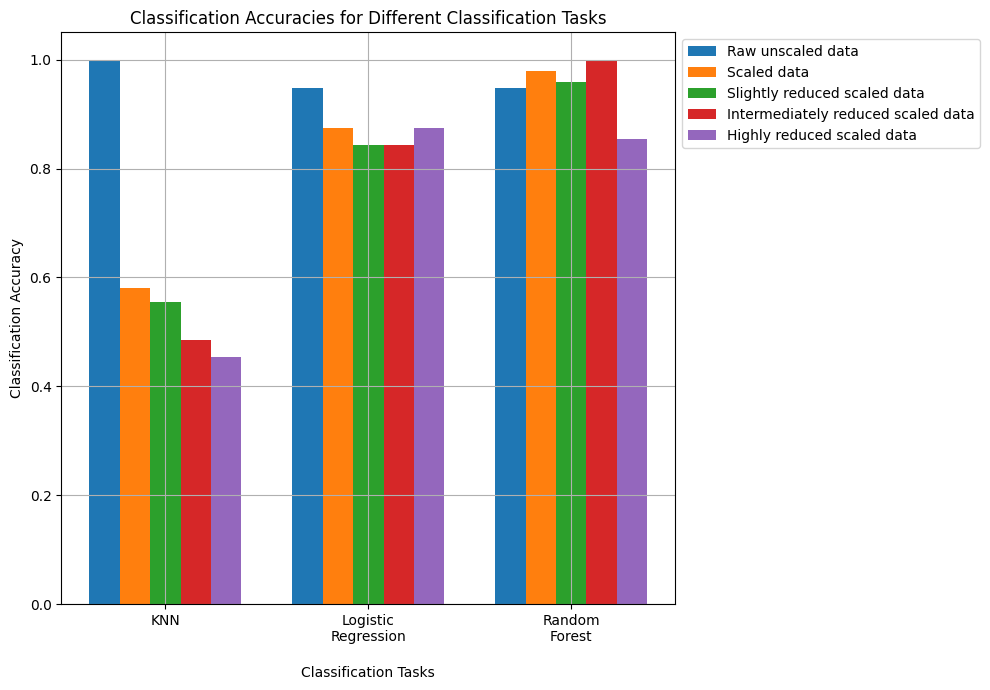

In [151]:
#PLOTTING SINGLE GROUPED BAR CHART
import matplotlib.pyplot as plt

# Number of groups- KNN, LR AND RF
n_groups = 3

# Example accuracy values for 5 data conditions (3 accuracies each)
accuracies_raw_unscaled = [knn_raw_unscaled_data_score, lr_raw_unscaled_data_score, rf_raw_unscaled_data_score]
accuracies_scaled = [knn_scaled_data_score, lr_scaled_data_score, rf_scaled_data_score]
accuracies_slightly_reduced = [knn_slightly_reduced_scaled_data_score, lr_slightly_reduced_scaled_data_score, rf_slightly_reduced_scaled_data_score]
accuracies_intermediately_reduced = [knn_intermediately_reduced_scaled_data_score, lr_intermediately_reduced_scaled_data_score, rf_intermediately_reduced_scaled_data_score]
accuracies_highly_reduced = [knn_highly_reduced_data_score, lr_highly_reduced_data_score, rf_highly_reduced_data_score]

# Names of each group- 
groups = ['KNN', 'Logistic\nRegression\n', 'Random\nForest']

# Setting the positions and width for the bars
n_conditions = 5  # Number of data conditions
index = np.arange(n_groups)  # Group positions
bar_width = 0.15  # Narrower bar width to fit all bars
opacity = 1

# Plotting the bars
fig, ax = plt.subplots(figsize=(10, 7))

# Adjusting bar positions
positions = [index + bar_width * shift for shift in range(n_conditions)]

# Plot each condition
plt.bar(positions[0], accuracies_raw_unscaled, bar_width, alpha=opacity, label='Raw unscaled data')
plt.bar(positions[1], accuracies_scaled, bar_width, alpha=opacity, label='Scaled data')
plt.bar(positions[2], accuracies_slightly_reduced, bar_width, alpha=opacity, label='Slightly reduced scaled data')
plt.bar(positions[3], accuracies_intermediately_reduced, bar_width, alpha=opacity, label='Intermediately reduced scaled data')
plt.bar(positions[4], accuracies_highly_reduced, bar_width, alpha=opacity, label='Highly reduced scaled data')


# Set the y and x axis label
ax.set_ylabel('Classification Accuracy')

ax.set_xlabel('Classification Tasks')

# Set the chart's title
ax.set_title('Classification Accuracies for Different Classification Tasks')

# Set the position of the x ticks
ax.set_xticks(index + bar_width * 2) 

# Set the labels for the x ticks
ax.set_xticklabels(groups)

# Adding the legend with some space from the chart
plt.legend(['Raw unscaled data', 'Scaled data', 'Slightly reduced scaled data', 'Intermediately reduced scaled data', 'Highly reduced scaled data'], loc='upper left', bbox_to_anchor=(1, 1))
# Adjust layout to make room for the legend
plt.tight_layout()
plt.grid()
plt.show()